# Efecto de distintos valores de learning rate $\alpha$

El valor del learning rate $\alpha$ determina la velocidad de aprendizaje. Si recordamos los parámetros se modificaban mediante la siguiente fórmula

$$\omega_i' = \omega_i - \alpha\frac{\partial loss}{\partial \omega_i}$$

Es decir el parámetro se modifica restándole el gradiente de la función de coste multiplicado por el learning rate $\alpha$. Por lo que modificar este valor va a hacer que se modifique más o menos el valor del parámetro, es decir, que la red aprenda más o menos deprisa

Vamos e ver este efecto en el primer ejemplo de entrenamiento que vimos

Supongamos que tenemos la siguiente distribución de puntos

In [1]:
import numpy as np

x = np.array( [ 0.        ,  0.34482759,  0.68965517,  1.03448276,  1.37931034,
        1.72413793,  2.06896552,  2.4137931 ,  2.75862069,  3.10344828,
        3.44827586,  3.79310345,  4.13793103,  4.48275862,  4.82758621,
        5.17241379,  5.51724138,  5.86206897,  6.20689655,  6.55172414,
        6.89655172,  7.24137931,  7.5862069 ,  7.93103448,  8.27586207,
        8.62068966,  8.96551724,  9.31034483,  9.65517241, 10.        ])

y = np.array( [-0.16281253,  1.88707606,  0.39649312,  0.03857752,  4.0148778 ,
        0.58866234,  3.35711859,  1.94314906,  6.96106424,  5.89792585,
        8.47226615,  3.67698542, 12.05958678,  9.85234481,  9.82181679,
        6.07652248, 14.17536744, 12.67825433, 12.97499286, 11.76098542,
       12.7843083 , 16.42241036, 13.67913705, 15.55066478, 17.45979602,
       16.41982806, 17.01977617, 20.28151197, 19.38148414, 19.41029831])

Los representamos

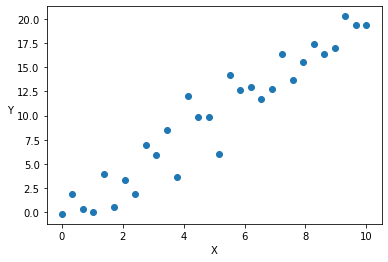

In [2]:
import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('Y  ', rotation=0)
plt.show()

Queremos crear una red neuronal que se ajuste a esos puntos, así que hacemos todo el proceso

## Dataset y Dataloader

Creamos un dataset

In [24]:
import torch

class Dataset(torch.utils.data.Dataset):
    def __init__(self, x, y):
        self.x = torch.from_numpy(x).float()
        self.x = self.x.reshape((len(self.x), 1))
        self.y = torch.from_numpy(y).float()
        self.y = self.y.reshape((len(self.y), 1))

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [25]:
dataset = Dataset(x, y)

x.shape, y.shape, len(dataset)

((30,), (30,), 30)

In [26]:
sample = dataset[0]
x_sample, y_sample = sample

x_sample.dtype, y_sample.dtype

(torch.float32, torch.float32)

In [27]:
from torch.utils.data import DataLoader

BS = 4

dataloader = DataLoader(dataset, batch_size=BS)

In [28]:
batch = next(iter(dataloader))
sample_x, sample_y = batch
sample_x.shape, sample_y.shape

(torch.Size([4, 1]), torch.Size([4, 1]))

## Red neuronal

In [29]:
from torch import nn

class Model(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super().__init__()
        self.layer = torch.nn.Linear(num_inputs, num_outputs)

    def forward(self, x):
        logits = self.layer(x)
        return logits

In [30]:
num_inputs = 1
num_outputs = 1
model = Model(num_inputs, num_outputs)

model

Model(
  (layer): Linear(in_features=1, out_features=1, bias=True)
)

In [31]:
logits = model(sample_x)
logits.shape

torch.Size([4, 1])

In [32]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

model.to(device)

Using cuda device


Model(
  (layer): Linear(in_features=1, out_features=1, bias=True)
)

## Función de pérdida y optimizador

In [33]:
LR = 1e-3

loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LR)

## Ciclo de entrenamiento

In [39]:
num_prints = 2

def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # X and y to device
        X, y = X.to(device), y.to(device)

        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % int(len(dataloader)/(num_prints-1)) == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [40]:
epochs = 14
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(dataloader, model, loss_fn, optimizer)
print("Done!")

Epoch 1
-------------------------------
loss: 2.612172  [    0/   30]
Epoch 2
-------------------------------
loss: 1.430887  [    0/   30]
Epoch 3
-------------------------------
loss: 1.272377  [    0/   30]
Epoch 4
-------------------------------
loss: 1.309957  [    0/   30]
Epoch 5
-------------------------------
loss: 1.360888  [    0/   30]
Epoch 6
-------------------------------
loss: 1.395461  [    0/   30]
Epoch 7
-------------------------------
loss: 1.415446  [    0/   30]
Epoch 8
-------------------------------
loss: 1.426282  [    0/   30]
Epoch 9
-------------------------------
loss: 1.431970  [    0/   30]
Epoch 10
-------------------------------
loss: 1.434892  [    0/   30]
Epoch 11
-------------------------------
loss: 1.436358  [    0/   30]
Epoch 12
-------------------------------
loss: 1.437067  [    0/   30]
Epoch 13
-------------------------------
loss: 1.437383  [    0/   30]
Epoch 14
-------------------------------
loss: 1.437498  [    0/   30]
Done!
